**Author : VEDANT PATIL**

Task 7__DEC'20

**!!Stock Market Prediction using Numerical and Textual Analysis!!**

MACHINE STATS :

Intel i5 8th Gen ||12GB RAM || ON_BOARD 2GB RADEON GRAPHICS 

In [474]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [475]:
data_stock = pd.read_csv('D:\SPARKS FOUNDATION\BSESN.csv')

In [476]:
data_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2001,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,03-01-2001,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,04-01-2001,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,05-01-2001,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,08-01-2001,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0


In [477]:
data_stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4978,03-12-2020,44902.01953,44953.01172,44551.42188,44632.64844,44632.64844,30700.0
4979,04-12-2020,44665.91016,45148.28125,44665.91016,45079.55078,45079.55078,27600.0
4980,07-12-2020,45099.92188,45458.92188,45024.46875,45426.96875,45426.96875,18700.0
4981,08-12-2020,45568.80078,45742.23047,45335.17188,45608.51172,45608.51172,18200.0
4982,09-12-2020,45891.03906,46164.10156,45792.01172,46103.50000,46103.50000,20700.0


In [478]:
#Convert date column of the dataset using pandas library
#data_stock['Date'] = pd.to_datetime(data_stock['Date'])

In [479]:
# setting column 'Date' as the index column
data_stock.set_index('Date', inplace= True)

In [480]:
#Check NULL values
data_stock.isnull().sum()

Open         75
High         75
Low          75
Close        75
Adj Close    75
Volume       75
dtype: int64

In [481]:
data_stock.shape

(4983, 6)

In [482]:
# Drop null values
data_stock.dropna(inplace=True)

In [483]:
data_stock.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [484]:
data_stock.shape

(4908, 6)

In [485]:
data_stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 02-01-2001 to 09-12-2020
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4908 non-null   float64
 1   High       4908 non-null   float64
 2   Low        4908 non-null   float64
 3   Close      4908 non-null   float64
 4   Adj Close  4908 non-null   float64
 5   Volume     4908 non-null   float64
dtypes: float64(6)
memory usage: 268.4+ KB


<AxesSubplot:xlabel='Date'>

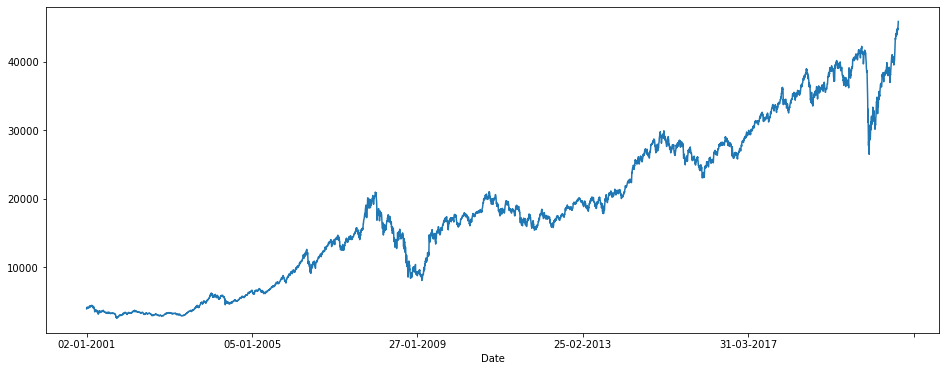

In [486]:
#Visualization dataset columns
data_stock['Open'].plot(figsize=(16,6))

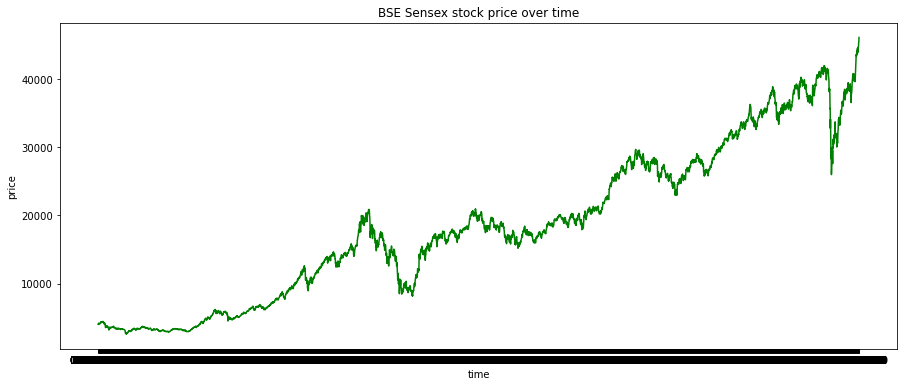

In [487]:
plt.figure(figsize=(15,6))
plt.plot(data_stock["Close"], 'green')
plt.title("BSE Sensex stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

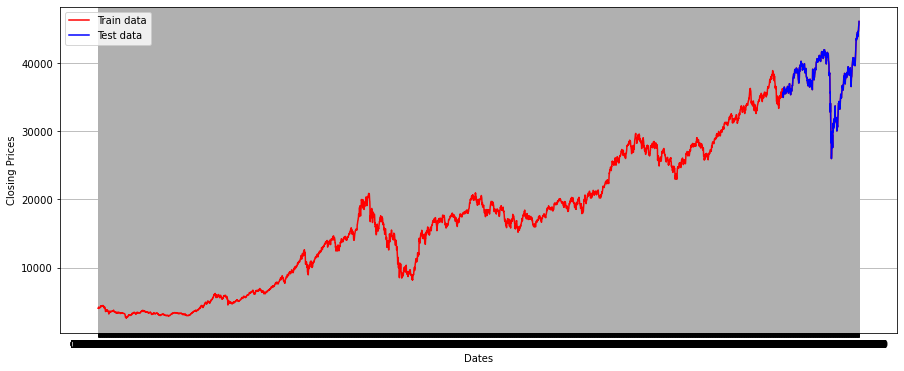

In [488]:
#split data into train and training set

train_data, test_data = data_stock[:int(len(data_stock)*0.9)], data_stock[int(len(data_stock)*0.9):]
plt.figure(figsize=(15,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(data_stock['Close'], 'red', label='Train data')
plt.plot(test_data['Close'], 'blue', label='Test data')
plt.legend()

# **AUTO_ARIMA MODEL**

**Parameters of ARIMA MODEL**

p (past values used for forecasting the next value)
q (past forecast errors used to predict the future values)
d (order of differencing)

In [489]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt
import joblib

In [490]:
# ARIMA MODEL is a popular statistical model for analyzing and forecasting Time series data

model_autoARIMA = auto_arima(train_data['Close'], start_p=0, start_q=0,
                      test='adf',       # use adf test to find the value of 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=99548.741, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.67 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=59670.977, Time=0.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=59672.600, Time=1.50 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=2.78 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.92 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=59668.997, Time=1.64 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=59684.360, Time=2.93 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=59669.990, Time=2.26 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=59673.550, Time=1.81 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=1.72 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=3.11 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.78 sec


In [491]:
# Fitting the ARIMA model

model = ARIMA(train_data['Close'], order=(0,1,1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4416
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -29818.805
Method:                       css-mle   S.D. of innovations            207.163
Date:                Fri, 11 Dec 2020   AIC                          59643.609
Time:                        23:57:29   BIC                          59662.788
Sample:                             1   HQIC                         59650.374
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.0863      3.372      2.101      0.036       0.477      13.696
ma.L1.D.Close     0.0817      0.015      5.398      0.000       0.052       0.111
                                    Root

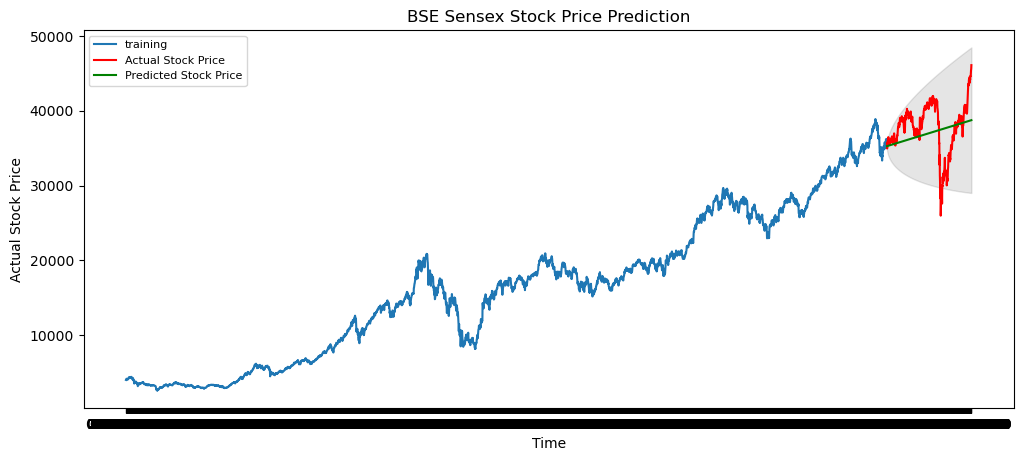

In [492]:
# Forecast

fc, se, conf = fitted.forecast(491, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data['Close'], label='training')
plt.plot(test_data['Close'], color = 'red', label='Actual Stock Price')
plt.plot(fc_series, color = 'green',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('BSE Sensex Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [493]:
# report performance
mse = mean_squared_error(test_data['Close'], fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data['Close'], fc)
print('MAE: '+str(mae))
rmse = sqrt(mean_squared_error(test_data['Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data['Close'])/np.abs(test_data['Close']))
print('MAPE: '+str(mape))

MSE: 11836742.954240436
MAE: 2706.4069732153653
RMSE: 3440.4567944155956
MAPE: 0.07399750762155455


In [494]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 4416
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -29818.805
Method:                       css-mle   S.D. of innovations            207.163
Date:                Sat, 12 Dec 2020   AIC                          59643.609
Time:                        00:00:47   BIC                          59662.788
Sample:                             1   HQIC                         59650.374
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.0863      3.372      2.101      0.036       0.477      13.696
ma.L1.D.Close     0.0817      0.015      5.398      0.000       0.052       0.111
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          -12.2325           +0.0000j           12.2325            0.5000
-----------------------------------------------------------------------------
"""

# STACKED LSTM(LONG SHORT TERM MEMORY)

**x(t) --> A1 --> h(t-1) _______ x(t) -->  A2 --> h(t)_______ x(t) --> A3 --> h(t+1)

In [495]:
stock_data=data_stock.reset_index()['Close']

In [496]:
stock_data

0        4018.879883
1        4060.020020
2        4115.370117
3        4183.729980
4        4120.430176
            ...     
4903    44632.648440
4904    45079.550780
4905    45426.968750
4906    45608.511720
4907    46103.500000
Name: Close, Length: 4908, dtype: float64

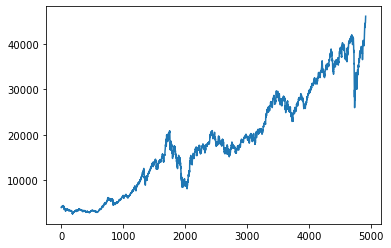

In [497]:
plt.plot(stock_data)

In [498]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
stock_data=scaler.fit_transform(np.array(stock_data).reshape(-1,1))

In [499]:
print(stock_data)

[[0.03261263]
 [0.03355831]
 [0.03483063]
 ...
 [0.98444877]
 [0.98862184]
 [1.        ]]


In [500]:
##splitting dataset into train and test split
training_size=int(len(stock_data)*0.65) 
test_size=len(stock_data)-training_size
train_data,test_data=stock_data[0:training_size,:],stock_data[training_size:len(stock_data),:1]

In [501]:
training_size,test_size

(3190, 1718)

In [588]:
train_data


array([[0.03261263],
       [0.03355831],
       [0.03483063],
       ...,
       [0.41817003],
       [0.42060846],
       [0.41961797]])

In [557]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [558]:
import numpy
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [559]:
print(X_train.shape), print(y_train.shape)

(3089, 100)
(3089,)


(None, None)

In [560]:
print(X_test.shape), print(ytest.shape)

(1617, 100)
(1617,)


(None, None)

In [561]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [562]:
import tensorflow as tf

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [563]:
#A Sequential model is not appropriate when:

#Your model has multiple inputs or multiple outputs
#Any of your layers has multiple inputs or multiple outputs
#You need to do layer sharing

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [564]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_19 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_20 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [565]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
49/49 [==============================] - 6s 117ms/step - loss: 0.0052 - val_loss: 0.0018
Epoch 2/100
49/49 [==============================] - 5s 108ms/step - loss: 2.2370e-04 - val_loss: 0.0025
Epoch 3/100
49/49 [==============================] - 5s 108ms/step - loss: 1.9068e-04 - val_loss: 0.0025
Epoch 4/100
49/49 [==============================] - 5s 109ms/step - loss: 1.8479e-04 - val_loss: 0.0036
Epoch 5/100
49/49 [==============================] - 5s 108ms/step - loss: 1.9053e-04 - val_loss: 0.0042
Epoch 6/100
49/49 [==============================] - 5s 108ms/step - loss: 1.7826e-04 - val_loss: 0.0033
Epoch 7/100
49/49 [==============================] - 5s 108ms/step - loss: 1.7727e-04 - val_loss: 0.0019
Epoch 8/100
49/49 [==============================] - 5s 108ms/step - loss: 1.6813e-04 - val_loss: 0.0020
Epoch 9/100
49/49 [==============================] - 5s 108ms/step - loss: 1.5331e-04 - val_loss: 0.0016
Epoch 10/100
49/49 [==============================] - 5s 10

49/49 [==============================] - 5s 108ms/step - loss: 4.4098e-05 - val_loss: 7.2304e-05
Epoch 77/100
49/49 [==============================] - 5s 108ms/step - loss: 3.1335e-05 - val_loss: 1.5541e-04
Epoch 78/100
49/49 [==============================] - 5s 108ms/step - loss: 3.5653e-05 - val_loss: 9.2322e-05
Epoch 79/100
49/49 [==============================] - 5s 108ms/step - loss: 2.9217e-05 - val_loss: 1.0990e-04
Epoch 80/100
49/49 [==============================] - 5s 108ms/step - loss: 3.2663e-05 - val_loss: 4.0581e-04
Epoch 81/100
49/49 [==============================] - 5s 107ms/step - loss: 3.0422e-05 - val_loss: 1.6463e-04
Epoch 82/100
49/49 [==============================] - 5s 108ms/step - loss: 2.7097e-05 - val_loss: 8.4575e-05
Epoch 83/100
49/49 [==============================] - 5s 108ms/step - loss: 3.2084e-05 - val_loss: 4.4340e-04
Epoch 84/100
49/49 [==============================] - 5s 110ms/step - loss: 2.9080e-05 - val_loss: 8.8662e-05
Epoch 85/100
49/49 [===

In [566]:
tf.__version__

'2.3.1'

In [567]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [568]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [569]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

13195.839972182463

In [570]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

31758.12852815396

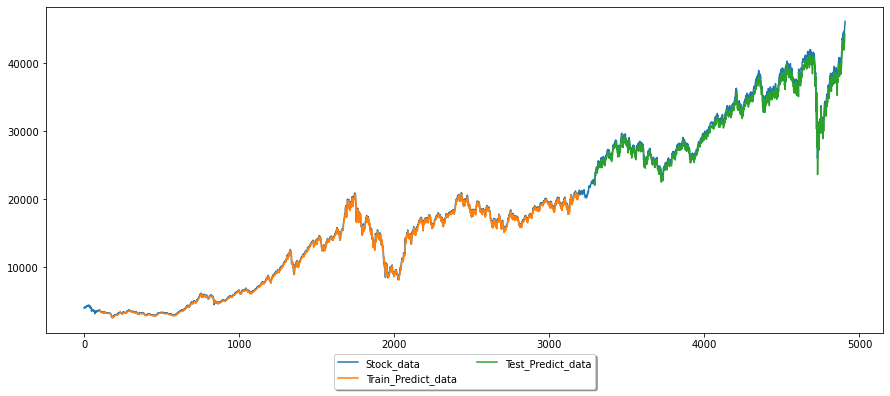

In [590]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(stock_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(stock_data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(stock_data)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(stock_data), label= "Stock_data")
plt.plot(trainPredictPlot, label= "Train_Predict_data")
plt.plot(testPredictPlot, label= "Test_Predict_data")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()

In [591]:
len(test_data)

1718

In [592]:
x_input=test_data[1618:].reshape(1,-1)
x_input.shape

(1, 100)

In [593]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [594]:
temp_input

[0.8003715632358559,
 0.8121255890466141,
 0.8107737722416172,
 0.8169560325791663,
 0.8166900691061875,
 0.8122267844022817,
 0.8250584023478597,
 0.8153621371120443,
 0.807660238985942,
 0.8046908218889848,
 0.7893520350684059,
 0.8065531951164879,
 0.8059881348828668,
 0.8143121108813732,
 0.8146596951389796,
 0.8179124957347167,
 0.8230829811224026,
 0.8222236729467955,
 0.8208642238612519,
 0.8109075620762383,
 0.8148944111547802,
 0.8258714676796829,
 0.8278591005999881,
 0.818793174433775,
 0.8237198748551313,
 0.8320953017985073,
 0.8331251247713543,
 0.8384130580450145,
 0.8393221108612867,
 0.8474557280871582,
 0.8281694213161327,
 0.8344335718426642,
 0.8386914127391226,
 0.8365056092393546,
 0.8219375062159925,
 0.8233178766644842,
 0.8221253507012252,
 0.8181847446963343,
 0.8330433242305786,
 0.8333704360558728,
 0.831119533476272,
 0.8377333333873092,
 0.843675400433484,
 0.8362506899657298,
 0.8331697511890078,
 0.8145118978869662,
 0.8076144453026612,
 0.80610522348641

In [595]:
# demonstrate prediction for next 100 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.97577214]
101
1 day input [0.81212559 0.81077377 0.81695603 0.81669007 0.81222678 0.8250584
 0.81536214 0.80766024 0.80469082 0.78935204 0.8065532  0.80598813
 0.81431211 0.8146597  0.8179125  0.82308298 0.82222367 0.82086422
 0.81090756 0.81489441 0.82587147 0.8278591  0.81879317 0.82371987
 0.8320953  0.83312512 0.83841306 0.83932211 0.84745573 0.82816942
 0.83443357 0.83869141 0.83650561 0.82193751 0.82331788 0.82212535
 0.81818474 0.83304332 0.83337044 0.83111953 0.83773333 0.8436754
 0.83625069 0.83316975 0.8145119  0.80761445 0.80610522 0.78047916
 0.79967442 0.81330483 0.8131115  0.8152886  0.82975003 0.83610927
 0.84992132 0.856918   0.86389958 0.87141202 0.87335009 0.87407902
 0.87796898 0.8534576  0.85930933 0.86962166 0.87221386 0.87595926
 0.87253837 0.87545795 0.86304512 0.87170196 0.85791819 0.85395046
 0.8508293  0.85412807 0.86570305 0.87386361 0.89050644 0.90321576
 0.91940694 0.93504294 0.94230728 0.93687137 0.93884383 0.95056041
 0.95578621 0.94245185 0.94894075 0

10 day output [[0.7220743]]
11 day input [0.8065532  0.80598813 0.81431211 0.8146597  0.8179125  0.82308298
 0.82222367 0.82086422 0.81090756 0.81489441 0.82587147 0.8278591
 0.81879317 0.82371987 0.8320953  0.83312512 0.83841306 0.83932211
 0.84745573 0.82816942 0.83443357 0.83869141 0.83650561 0.82193751
 0.82331788 0.82212535 0.81818474 0.83304332 0.83337044 0.83111953
 0.83773333 0.8436754  0.83625069 0.83316975 0.8145119  0.80761445
 0.80610522 0.78047916 0.79967442 0.81330483 0.8131115  0.8152886
 0.82975003 0.83610927 0.84992132 0.856918   0.86389958 0.87141202
 0.87335009 0.87407902 0.87796898 0.8534576  0.85930933 0.86962166
 0.87221386 0.87595926 0.87253837 0.87545795 0.86304512 0.87170196
 0.85791819 0.85395046 0.8508293  0.85412807 0.86570305 0.87386361
 0.89050644 0.90321576 0.91940694 0.93504294 0.94230728 0.93687137
 0.93884383 0.95056041 0.95578621 0.94245185 0.94894075 0.95342082
 0.96366994 0.94769605 0.95761797 0.95508898 0.96671388 0.96585413
 0.96618995 0.97646277 

20 day output [[0.5964367]]
21 day input [0.82587147 0.8278591  0.81879317 0.82371987 0.8320953  0.83312512
 0.83841306 0.83932211 0.84745573 0.82816942 0.83443357 0.83869141
 0.83650561 0.82193751 0.82331788 0.82212535 0.81818474 0.83304332
 0.83337044 0.83111953 0.83773333 0.8436754  0.83625069 0.83316975
 0.8145119  0.80761445 0.80610522 0.78047916 0.79967442 0.81330483
 0.8131115  0.8152886  0.82975003 0.83610927 0.84992132 0.856918
 0.86389958 0.87141202 0.87335009 0.87407902 0.87796898 0.8534576
 0.85930933 0.86962166 0.87221386 0.87595926 0.87253837 0.87545795
 0.86304512 0.87170196 0.85791819 0.85395046 0.8508293  0.85412807
 0.86570305 0.87386361 0.89050644 0.90321576 0.91940694 0.93504294
 0.94230728 0.93687137 0.93884383 0.95056041 0.95578621 0.94245185
 0.94894075 0.95342082 0.96366994 0.94769605 0.95761797 0.95508898
 0.96671388 0.96585413 0.96618995 0.97646277 0.98444877 0.98862184
 1.         0.97577214 0.92258453 0.87142229 0.83613247 0.81692463
 0.80666482 0.79728431 0

In [628]:
day_new=np.arange(1,100)
day_pred=np.arange(101,131)

In [629]:
len(stock_data)

4908

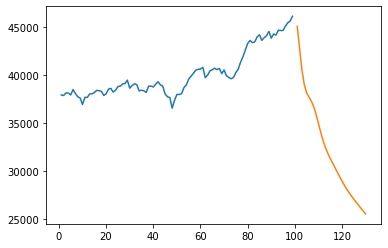

In [637]:
plt.plot(day_new,scaler.inverse_transform(stock_data[4809:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

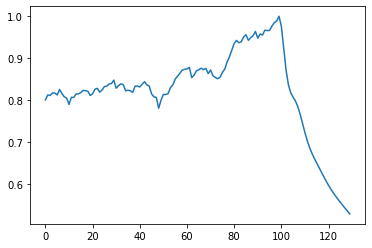

In [615]:
new_stock=stock_data.tolist()
new_stock.extend(lst_output)
plt.plot(new_stock[4808:])

# Textual Analysis 

In [638]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VEDANT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\VEDANT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [639]:
cols = ['Date','Category','News']
df_news = pd.read_csv('D:\SPARKS FOUNDATION\india-news-headlines.csv', names = cols)
df_news

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010101,sports.wwe,win over cena satisfying but defeating underta...
2,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
3,20010102,unknown,Fissures in Hurriyat over Pak visit
4,20010102,unknown,America's unwanted heading for India?
...,...,...,...
1048571,20110207,sports.icc-world-cup-2015,Banned trio summoned by Pakistan govt over fix...
1048572,20110207,sports.more-sports.others,Nadal pips Messi to bag Laureus 'World Sportsm...
1048573,20110207,city.patna,Central team to visit Kutku dam in Bihar
1048574,20110207,city.bhubaneswar,Red bandh evokes lukewarm response


In [640]:
df_news.drop(0, inplace=True)
df_news.drop('Category', axis = 1, inplace=True)
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 1 to 1048575
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Date    1048575 non-null  object
 1   News    1048575 non-null  object
dtypes: object(2)
memory usage: 24.0+ MB


In [641]:
df_news.head()

,Date,News
1,20010101,win over cena satisfying but defeating underta...
2,20010102,Status quo will not be disturbed at Ayodhya; s...
3,20010102,Fissures in Hurriyat over Pak visit
4,20010102,America's unwanted heading for India?
5,20010102,For bigwigs; it is destination Goa


In [642]:
#Converting data type of Date column 
df_news['Date'] = pd.to_datetime(df_news['Date'],format= '%Y%m%d')
df_news

,Date,News
1,2001-01-01,win over cena satisfying but defeating underta...
2,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
3,2001-01-02,Fissures in Hurriyat over Pak visit
4,2001-01-02,America's unwanted heading for India?
5,2001-01-02,For bigwigs; it is destination Goa
...,...,...
1048571,2011-02-07,Banned trio summoned by Pakistan govt over fix...
1048572,2011-02-07,Nadal pips Messi to bag Laureus 'World Sportsm...
1048573,2011-02-07,Central team to visit Kutku dam in Bihar
1048574,2011-02-07,Red bandh evokes lukewarm response


In [643]:
#Grouping the headlines for each day
df_news['News'] = df_news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news.head(10)

,Date,News
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-03,Powerless north India gropes in the dark Think...
3,2001-01-04,The string that pulled Stephen Hawking to Indi...
4,2001-01-05,Light combat craft takes India into club class...
5,2001-01-06,Light combat craft takes India into club class...
6,2001-01-07,Muslim body rules out talks on Ayodhya Bajrang...
7,2001-01-08,Sangh Parivar; Babri panel up the ante Frontru...
8,2001-01-09,Financier Bharat Shah held for alleged links w...
9,2001-01-10,Fend for yourselves; Pande tells doctors Burea...


In [644]:
df_news.shape

(3649, 2)

In [645]:
df_news.tail()


,Date,News
3644,2011-02-03,All's not well with Deepika; Akshay Arshad ups...
3645,2011-02-04,Abhishek Bachchan Wish the star a very happy b...
3646,2011-02-05,Abhishek Bachchan Labourers clash List of LGT ...
3647,2011-02-06,Akki; Urmila meet after 14 years No melody in ...
3648,2011-02-07,Venky in Nagavalli 2? Lata apologizes to Dev A...


In [646]:
df_news.tail()

,Date,News
3644,2011-02-03,All's not well with Deepika; Akshay Arshad ups...
3645,2011-02-04,Abhishek Bachchan Wish the star a very happy b...
3646,2011-02-05,Abhishek Bachchan Labourers clash List of LGT ...
3647,2011-02-06,Akki; Urmila meet after 14 years No melody in ...
3648,2011-02-07,Venky in Nagavalli 2? Lata apologizes to Dev A...


In [647]:
headline_cats


['business.india-business',
 'business.international-business',
 'business.personal-finance',
 'business']

In [648]:
#Cleaning headlines
ps= PorterStemmer()
c = []
for i in range(0,len(df_news['News'])):
    news = re.sub('[^a-zA-Z]',' ',df_news['News'][i])
    news = news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
    news=' '.join(news)
    c.append(news)

In [649]:
df_news['News'] = pd.Series(c)
df_news

,Date,News
0,2001-01-01,win cena satisfi defeat undertak bigger roman ...
1,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...
2,2001-01-03,powerless north india grope dark think laxman ...
3,2001-01-04,string pull stephen hawk india vajpaye give bi...
4,2001-01-05,light combat craft take india club class hawk ...
...,...,...
3644,2011-02-03,well deepika akshay arshad upset wife maria pa...
3645,2011-02-04,abhishek bachchan wish star happi birthday per...
3646,2011-02-05,abhishek bachchan labour clash list lgt bank a...
3647,2011-02-06,akki urmila meet year melodi today music lesli...


In [650]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [651]:
#Adding subjectivity and polarity columns
df_news['Subjectivity'] = df_news['News'].apply(getSubjectivity)
df_news['Polarity'] = df_news['News'].apply(getPolarity)
df_news

,Date,News,Subjectivity,Polarity
0,2001-01-01,win cena satisfi defeat undertak bigger roman ...,0.450000,0.400000
1,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074
2,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000
3,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481
4,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404
...,...,...,...,...
3644,2011-02-03,well deepika akshay arshad upset wife maria pa...,0.349123,0.065558
3645,2011-02-04,abhishek bachchan wish star happi birthday per...,0.362757,0.060614
3646,2011-02-05,abhishek bachchan labour clash list lgt bank a...,0.378588,0.043108
3647,2011-02-06,akki urmila meet year melodi today music lesli...,0.395333,0.087425


In [652]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['News']]
df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['News']]
df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['News']]
df_news

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-01,win cena satisfi defeat undertak bigger roman ...,0.450000,0.400000,0.2023,0.234,0.469,0.297
1,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074,-0.8555,0.125,0.773,0.102
2,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000,-0.5994,0.132,0.755,0.113
3,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481,0.9169,0.099,0.791,0.110
4,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404,-0.3612,0.171,0.659,0.170
...,...,...,...,...,...,...,...,...
3644,2011-02-03,well deepika akshay arshad upset wife maria pa...,0.349123,0.065558,-0.9996,0.149,0.750,0.101
3645,2011-02-04,abhishek bachchan wish star happi birthday per...,0.362757,0.060614,-0.9998,0.148,0.764,0.087
3646,2011-02-05,abhishek bachchan labour clash list lgt bank a...,0.378588,0.043108,-0.9999,0.160,0.763,0.077
3647,2011-02-06,akki urmila meet year melodi today music lesli...,0.395333,0.087425,-0.9998,0.144,0.772,0.084


In [ ]:
#df_merge = pd.merge(data_stock, df_news, how='inner', on='Date')
#df_merge

In [654]:
df = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,6679.200195,0.494037,0.113849,-0.7650,0.117,0.773,0.111
1,6651.009766,0.424917,0.049857,-0.9955,0.177,0.737,0.087
2,6458.839844,0.434571,0.106612,-0.9794,0.140,0.774,0.087
3,6367.390137,0.443313,0.041705,-0.9761,0.162,0.711,0.127
4,6420.459961,0.415661,0.150971,0.9850,0.060,0.797,0.144
...,...,...,...,...,...,...,...
1491,18494.179690,0.395333,0.087425,-0.9998,0.144,0.772,0.084
1492,18762.800780,0.387988,0.032372,-0.9995,0.130,0.783,0.087
1493,18314.330080,0.452911,0.135909,-0.9993,0.144,0.748,0.108
1494,17480.830080,0.396759,0.078003,-0.9990,0.129,0.769,0.103


In [655]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.038872,0.805791,0.360564,0.117462,0.303030,0.726776,0.388298
1,0.036971,0.598795,0.247550,0.002200,0.606061,0.530055,0.260638
2,0.024013,0.627706,0.347782,0.010251,0.419192,0.732240,0.260638
3,0.017846,0.653885,0.233153,0.011901,0.530303,0.387978,0.473404
4,0.021424,0.571075,0.426124,0.992549,0.015152,0.857923,0.563830


In [656]:
X = new_df.drop('Close', axis=1)
y =new_df['Close']

In [657]:
X.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.805791,0.360564,0.117462,0.303030,0.726776,0.388298
1,0.598795,0.247550,0.002200,0.606061,0.530055,0.260638
2,0.627706,0.347782,0.010251,0.419192,0.732240,0.260638
3,0.653885,0.233153,0.011901,0.530303,0.387978,0.473404
4,0.571075,0.426124,0.992549,0.015152,0.857923,0.563830


In [658]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)
x_train.shape

(897, 6)

In [659]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
386,0.328148,0.247865,0.001650,0.621212,0.459016,0.303191
1301,0.422348,0.326755,0.000650,0.404040,0.721311,0.281915
132,0.455253,0.359966,0.001250,0.595960,0.409836,0.382979
265,0.734180,0.165398,0.010551,0.383838,0.721311,0.303191
1464,0.541714,0.236327,0.000050,0.469697,0.704918,0.228723
1238,0.382896,0.318002,0.000550,0.343434,0.879781,0.191489
88,0.611045,0.293402,0.011901,0.469697,0.519126,0.409574
793,0.326127,0.318566,0.000500,0.590909,0.420765,0.377660
1424,0.464521,0.280357,0.000050,0.454545,0.765027,0.186170
748,0.496327,0.281459,0.000350,0.555556,0.475410,0.361702


In [660]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [661]:
print(prediction[:10])
print(y_test[:10])
print(mean_squared_error(prediction,y_test))

[0.48068109 0.3328426  0.58084115 0.19787664 0.50324516 0.61899319
 0.50399677 0.56495972 0.62423444 0.33330875]
1127    0.662283
353     0.215315
733     0.939200
54      0.029179
794     0.651244
1427    0.952050
489     0.491048
445     0.455554
1079    0.539922
360     0.262655
Name: Close, dtype: float64
0.04741626762149205


In [662]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
predictions = dec_tree.predict(x_test)

In [663]:
print(predictions[:10])
print(y_test[:10])
print(mean_squared_error(predictions,y_test))

[0.66090772 0.30894402 0.64695403 0.07535599 0.23952949 0.4065034
 0.47585524 0.87364509 0.63492346 0.45729726]
1127    0.662283
353     0.215315
733     0.939200
54      0.029179
794     0.651244
1427    0.952050
489     0.491048
445     0.455554
1079    0.539922
360     0.262655
Name: Close, dtype: float64
0.09115863789587278


In [664]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [665]:
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.055330683848689124


**REFERENCE :** 
https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/ 

https://jfin-swufe.springeropen.com/articles/10.1186/s40854-019-0131-7#:~:text=Support%20Vector%20Machines%20(SVM)%20and,learning%20patterns%20and%20then%20predicting

https://www.analyticsvidhya.com/blog/2017/12/fundamentals-of-deep-learning-introduction-to-lstm/

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

https://keras.io/guides/sequential_model/

https://github.com/krishnaik06/Stock-MArket-Forecasting